In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path='/content/drive/MyDrive/Semester 3/AI_Assessment/Summer_transfer_window_2022.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(path)
df.head()

,Unnamed: 0.1,Unnamed: 0,day,name,age,positions,nationality,from_club,from_league,from_country,to_club,to_league,to_country,market_value,transfer_value
0,0,0,2022-07-31,David Raum,24.0,Left-Back,Germany,tsg-1899-hoffenheim,bundesliga,Germany,rasenballsport-leipzig,bundesliga,Germany,€20.00m,€26.00m
1,1,1,2022-07-31,Orel Mangala,24.0,Central Midfield,Belgium,vfb-stuttgart,bundesliga,Germany,nottingham-forest,premier-league,England,€15.00m,€13.00m
2,2,2,2022-07-31,Badr Benoun,28.0,Centre-Back,Morocco,el-ahly-kairo,egyptian-premier-league,Egypt,qatar-sc,qatar-stars-league,Qatar,€1.50m,€1.70m
3,3,3,2022-07-31,Federico Di Francesco,28.0,Left Winger,Italy,spal,serie-b,Italy,us-lecce,serie-a,Italy,€2.00m,€500Th.
4,4,4,2022-07-31,Matheus Jussa,26.0,Defensive Midfield,Brazil,fortaleza-esporte-clube,campeonato-brasileiro-serie-a,Brazil,qatar-sc,qatar-stars-league,Qatar,€1.00m,Loan fee:


In [4]:

df1 = df
df1

,Unnamed: 0.1,Unnamed: 0,day,name,age,positions,nationality,from_club,from_league,from_country,to_club,to_league,to_country,market_value,transfer_value
0,0,0,2022-07-31,David Raum,24.0,Left-Back,Germany,tsg-1899-hoffenheim,bundesliga,Germany,rasenballsport-leipzig,bundesliga,Germany,€20.00m,€26.00m
1,1,1,2022-07-31,Orel Mangala,24.0,Central Midfield,Belgium,vfb-stuttgart,bundesliga,Germany,nottingham-forest,premier-league,England,€15.00m,€13.00m
2,2,2,2022-07-31,Badr Benoun,28.0,Centre-Back,Morocco,el-ahly-kairo,egyptian-premier-league,Egypt,qatar-sc,qatar-stars-league,Qatar,€1.50m,€1.70m
3,3,3,2022-07-31,Federico Di Francesco,28.0,Left Winger,Italy,spal,serie-b,Italy,us-lecce,serie-a,Italy,€2.00m,€500Th.
4,4,4,2022-07-31,Matheus Jussa,26.0,Defensive Midfield,Brazil,fortaleza-esporte-clube,campeonato-brasileiro-serie-a,Brazil,qatar-sc,qatar-stars-league,Qatar,€1.00m,Loan fee:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38784,3755,3755,2022-09-01,Tony Medeiros,29.0,Left Winger,Bolivia,universitario-de-vinto,division-profesional-clausura,Bolivia,universitario-de-vinto-ii,unknown_league,Bolivia,€10Th.,-
38785,3756,3756,2022-09-01,Claudio Cristallo,19.0,Right Midfield,Italy,monopoli-primavera,primavera-2b,Italy,ss-monopoli-1966,serie-c-girone-c,Italy,€75Th.,-
38786,3757,3757,2022-09-01,Mark Seliskar,20.0,Left Midfield,Slovenia,nk-tabor-sezana,prva-liga,Slovenia,vitanest-bilje,druga-liga,Slovenia,€50Th.,loan transfer
38787,3758,3758,2022-09-01,Ivan Ivanov,17.0,Central Midfield,Bulgaria,levski-2020-lom-u19,unknown_league,Bulgaria,fk-levski-2020-lom,unknown_league,Bulgaria,€10Th.,-


In [5]:
#before cleaning the dataset
print("Data size: ")
df1.size

Data size: 


581835

In [6]:
#missing values

df2 = pd.DataFrame(df1, columns=['day','age','name','positions','nationality','from_club','from_league','from_country','to_club','to_league','to_country','market_value','transfer_value'])
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
        return 1000000.0
    if 'Th' in x:
        if len(x) > 1:
            return float(x.replace('Th', '')) * 1000
        return 1000.0
    if 'loan transfer' in x:
        if len(x) > 1:
            return float(x.replace('loan transfer', '0')) * 0
        return 0
    if '-' in x:
        if len(x) > 1:
            return float(x.replace('-', '0')) * 0
        return 0
    if '?' in x:
        if len(x) > 1:
            return float(x.replace('?', '0')) * 0
        return 0
    if 'free transfer' in x:
        if len(x) > 1:
            return float(x.replace('free transfer', '0')) * 0
        return 0
    if 'Loan fee:' in x:
        if len(x) > 1:
            return float(x.replace('Loan fee:', '0')) * 0
        return 0
    if 'draft' in x:
        if len(x) > 1:
            return float(x.replace('draft', '0')) * 0
        return 0

market_value = df1['market_value'].replace('[\€,]', '', regex=True).apply(value_to_float)
transfer_value = df1['transfer_value'].replace('[\€,]', '', regex=True).apply(value_to_float)

df2['market_value'] = market_value
df2['transfer_value'] = transfer_value

In [7]:
#cheacking for dublicate dataset
duplicates = df1.duplicated()
print(df1[duplicates])

Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, day, name, age, positions, nationality, from_club, from_league, from_country, to_club, to_league, to_country, market_value, transfer_value]
Index: []


In [8]:
df3 = df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
df3

,day,name,age,positions,nationality,from_club,from_league,from_country,to_club,to_league,to_country,market_value,transfer_value
0,2022-07-31,David Raum,24.0,Left-Back,Germany,tsg-1899-hoffenheim,bundesliga,Germany,rasenballsport-leipzig,bundesliga,Germany,€20.00m,€26.00m
1,2022-07-31,Orel Mangala,24.0,Central Midfield,Belgium,vfb-stuttgart,bundesliga,Germany,nottingham-forest,premier-league,England,€15.00m,€13.00m
2,2022-07-31,Badr Benoun,28.0,Centre-Back,Morocco,el-ahly-kairo,egyptian-premier-league,Egypt,qatar-sc,qatar-stars-league,Qatar,€1.50m,€1.70m
3,2022-07-31,Federico Di Francesco,28.0,Left Winger,Italy,spal,serie-b,Italy,us-lecce,serie-a,Italy,€2.00m,€500Th.
4,2022-07-31,Matheus Jussa,26.0,Defensive Midfield,Brazil,fortaleza-esporte-clube,campeonato-brasileiro-serie-a,Brazil,qatar-sc,qatar-stars-league,Qatar,€1.00m,Loan fee:
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38784,2022-09-01,Tony Medeiros,29.0,Left Winger,Bolivia,universitario-de-vinto,division-profesional-clausura,Bolivia,universitario-de-vinto-ii,unknown_league,Bolivia,€10Th.,-
38785,2022-09-01,Claudio Cristallo,19.0,Right Midfield,Italy,monopoli-primavera,primavera-2b,Italy,ss-monopoli-1966,serie-c-girone-c,Italy,€75Th.,-
38786,2022-09-01,Mark Seliskar,20.0,Left Midfield,Slovenia,nk-tabor-sezana,prva-liga,Slovenia,vitanest-bilje,druga-liga,Slovenia,€50Th.,loan transfer
38787,2022-09-01,Ivan Ivanov,17.0,Central Midfield,Bulgaria,levski-2020-lom-u19,unknown_league,Bulgaria,fk-levski-2020-lom,unknown_league,Bulgaria,€10Th.,-


In [9]:
df3 = df.replace(['unknown_league','unknown_country'],pd.NA)

In [10]:
#after cleaning the data size
df3.size

581835

Summary Statistics

Numerical Category

In [11]:
numeric_columns = df2.select_dtypes(include=['number'])


for column in numeric_columns.columns:
    minimum_value = numeric_columns[column].min()
    maximum_value = numeric_columns[column].max()
    data_range = maximum_value - minimum_value
    mean_value = numeric_columns[column].mean()
    median_value = numeric_columns[column].median()
    variance_value = numeric_columns[column].var()
    std_deviation_value = numeric_columns[column].std()


    print(f"Statistics for {column}:")
    print(f"Minimum: {minimum_value}")
    print(f"Maximum: {maximum_value}")
    print(f"Range: {data_range}")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Variance: {variance_value}")
    print(f"Standard Deviation: {std_deviation_value}")
    print("\n")


Statistics for age:
Minimum: 15.0
Maximum: 46.0
Range: 31.0
Mean: 24.952598278186912
Median: 24.0
Variance: 23.124636300405196
Standard Deviation: 4.808808199585964


Statistics for market_value:
Minimum: 8000.0
Maximum: 150000000.0
Range: 149992000.0
Mean: 441152.72371033026
Median: 100000.0
Variance: 5224406736806.867
Standard Deviation: 2285696.116461431


Statistics for transfer_value:
Minimum: 0.0
Maximum: 95000000.0
Range: 95000000.0
Mean: 153212.8235536764
Median: 0.0
Variance: 3661529837887.477
Standard Deviation: 1913512.4347355252




For Categorical Column

In [12]:
# unique values

categorical_columns = df3.select_dtypes(include=['object'])

# 1. Unique Values

unique_values = categorical_columns.apply(pd.Series.unique)
print("")
print(unique_values)


day               [2022-07-31, 2022-07-30, 2022-07-29, 2022-07-2...
name              [David Raum, Orel Mangala, Badr Benoun, Federi...
positions         [Left-Back, Central Midfield, Centre-Back, Lef...
nationality       [Germany, Belgium, Morocco, Italy, Brazil, Gre...
from_club         [tsg-1899-hoffenheim, vfb-stuttgart, el-ahly-k...
from_league       [bundesliga, egyptian-premier-league, serie-b,...
from_country      [Germany, Egypt, Italy, Brazil, Greece, Turkey...
to_club           [rasenballsport-leipzig, nottingham-forest, qa...
to_league         [bundesliga, premier-league, qatar-stars-leagu...
to_country        [Germany, England, Qatar, Italy, Greece, Austr...
market_value      [€20.00m, €15.00m, €1.50m, €2.00m, €1.00m, €50...
transfer_value    [€26.00m, €13.00m, €1.70m, €500Th., Loan fee:,...
dtype: object


In [13]:
#For Mode

mode_values = categorical_columns.mode().iloc[0]
print(mode_values)

day                   2022-07-01
name                     Rafinha
positions            Centre-Back
nationality                Italy
from_club             vereinslos
from_league       premier-league
from_country               Italy
to_club               vereinslos
to_league           premier-liga
to_country                 Italy
market_value              €50Th.
transfer_value     free transfer
Name: 0, dtype: object


In [14]:
#For date variable

if 'day' in df3.columns:
    print("Time period for date observations:")
    print(df3['day'].min(), "to", df3['day'].max())

Time period for date observations:
2022-07-01 to 2022-09-30


Visualize the Data: Make Interpret and Save your Charts

Univariate Analysis:

In [15]:
df2.describe()

,age,market_value,transfer_value
count,38564.000000,3.878900e+04,3.878800e+04
mean,24.952598,4.411527e+05,1.532128e+05
std,4.808808,2.285696e+06,1.913512e+06
min,15.000000,8.000000e+03,0.000000e+00
25%,21.000000,5.000000e+04,0.000000e+00
50%,24.000000,1.000000e+05,0.000000e+00
75%,28.000000,2.250000e+05,0.000000e+00
max,46.000000,1.500000e+08,9.500000e+07


In [16]:
df4 = df2.loc[(df2['to_league'] == 'premier-league') | (df2['to_league'] == 'serie-a') | (df2['to_league'] == 'bundesliga') | (df2['to_league'] == 'ligue-1') | (df2['to_league'] == 'laliga')]
df4

,day,age,name,positions,nationality,from_club,from_league,from_country,to_club,to_league,to_country,market_value,transfer_value
0,2022-07-31,24.0,David Raum,Left-Back,Germany,tsg-1899-hoffenheim,bundesliga,Germany,rasenballsport-leipzig,bundesliga,Germany,20000000.0,26000000.0
1,2022-07-31,24.0,Orel Mangala,Central Midfield,Belgium,vfb-stuttgart,bundesliga,Germany,nottingham-forest,premier-league,England,15000000.0,13000000.0
3,2022-07-31,28.0,Federico Di Francesco,Left Winger,Italy,spal,serie-b,Italy,us-lecce,serie-a,Italy,2000000.0,500000.0
54,2022-07-31,26.0,Ivan Kolev,Centre-Forward,Bulgaria,spartak-varna,efbet-liga,Bulgaria,sirens-fc,premier-league,Malta,125000.0,0.0
160,2022-07-30,24.0,Wilfried Kanga,Centre-Forward,Cote d'Ivoire,bsc-young-boys,super-league,Switzerland,hertha-bsc,bundesliga,Germany,2200000.0,4000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38597,2022-09-01,18.0,Taïryk Arconte,Right Winger,France,ac-ajaccio,ligue-1,France,stade-brest-29,ligue-1,France,400000.0,0.0
38620,2022-09-01,32.0,Oliver Kragl,Left Midfield,Germany,vereinslos,unknown_league,unknown_country,sv-ried,bundesliga,Austria,500000.0,0.0
38635,2022-09-01,29.0,Layvin Kurzawa,Left-Back,France,fc-paris-saint-germain,ligue-1,France,fc-fulham,premier-league,England,5000000.0,0.0
38680,2022-09-01,26.0,Kristian Keqi,Attacking Midfield,Albania,vereinslos,unknown_league,unknown_country,marsaxlokk-fc,premier-league,Malta,200000.0,0.0


In [17]:
df5 = df2.loc[df2['market_value'] > 40000000].sort_values('market_value', ascending=False)
df5

,day,age,name,positions,nationality,from_club,from_league,from_country,to_club,to_league,to_country,market_value,transfer_value
10954,2022-07-01,21.0,Erling Haaland,Centre-Forward,Norway,borussia-dortmund,bundesliga,Germany,manchester-city,premier-league,England,150000000.0,60000000.0
11005,2022-07-01,29.0,Romelu Lukaku,Centre-Forward,Belgium,fc-chelsea,premier-league,England,inter-mailand,serie-a,Italy,70000000.0,0.0
6696,2022-07-13,27.0,Raheem Sterling,Left Winger,England,manchester-city,premier-league,England,fc-chelsea,premier-league,England,70000000.0,56200000.0
10963,2022-07-01,30.0,Sadio Mané,Left Winger,Senegal,fc-liverpool,premier-league,England,fc-bayern-munchen,bundesliga,Germany,70000000.0,32000000.0
4217,2022-07-19,22.0,Matthijs de Ligt,Centre-Back,Netherlands,juventus-turin,serie-a,Italy,fc-bayern-munchen,bundesliga,Germany,70000000.0,67000000.0
10956,2022-07-01,24.0,Federico Chiesa,Right Winger,Italy,ac-florenz,serie-a,Italy,juventus-turin,serie-a,Italy,65000000.0,42500000.0
852,2022-07-28,23.0,Jules Koundé,Centre-Back,France,fc-sevilla,laliga,Spain,fc-barcelona,laliga,Spain,60000000.0,50000000.0
10952,2022-07-01,22.0,Aurélien Tchouameni,Defensive Midfield,France,as-monaco,ligue-1,Monaco,real-madrid,laliga,Spain,60000000.0,80000000.0
26741,2022-08-30,26.0,Fabián Ruiz,Central Midfield,Spain,ssc-neapel,serie-a,Italy,fc-paris-saint-germain,ligue-1,France,55000000.0,23000000.0
10953,2022-07-01,23.0,Darwin Núñez,Centre-Forward,Uruguay,benfica-lissabon,liga-nos,Portugal,fc-liverpool,premier-league,England,55000000.0,75000000.0


In [18]:
#for the  Bar Chart
import plotly.express as px
px.bar(df4, x='to_league', y='market_value',color='to_league', title='Top 5 countries with highest transfer value')

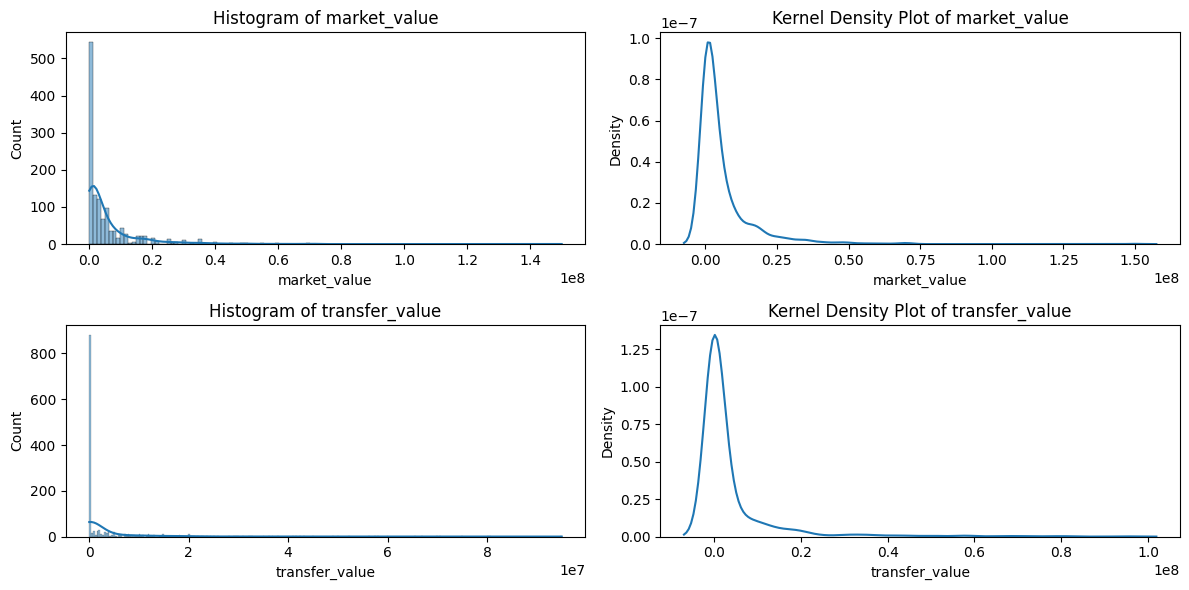

Skewness of market_value: 4.505450603320291
Skewness of transfer_value: 4.715995092701544


In [19]:
variable1 = 'market_value'
variable2 = 'transfer_value'

# Plot histograms for the two variables
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df4[variable1], kde=True)
plt.title(f'Histogram of {variable1}')

plt.subplot(2, 2, 2)
sns.kdeplot(df4[variable1])
plt.title(f'Kernel Density Plot of {variable1}')

plt.subplot(2, 2, 3)
sns.histplot(df4[variable2], kde=True)
plt.title(f'Histogram of {variable2}')

plt.subplot(2, 2, 4)
sns.kdeplot(df4[variable2])
plt.title(f'Kernel Density Plot of {variable2}')

plt.tight_layout()
plt.show()

# Calculate and print skewness for the two variables
skewness_variable1 = df4[variable1].skew()
skewness_variable2 = df4[variable2].skew()

print(f'Skewness of {variable1}: {skewness_variable1}')
print(f'Skewness of {variable2}: {skewness_variable2}')


In [20]:
import plotly.express as px

#for outliers
fig = px.box(df4, x='market_value', y='transfer_value', points='all')

# Show the plot
fig.show()


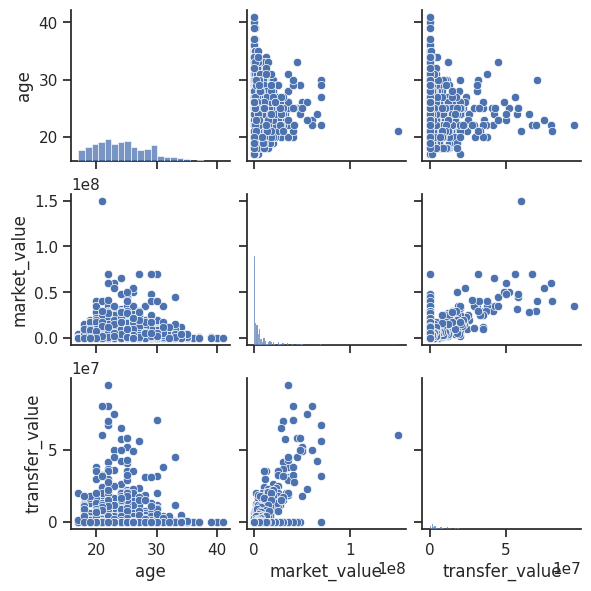

In [21]:
# Assuming df4 is your DataFrame
numeric_columns = df4.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df3.select_dtypes(include=['object']).columns

# Create a DataFrame for numeric columns
numeric_df = df4[numeric_columns]

sns.set(style="ticks")
sns.pairplot(numeric_df, height=2, kind="scatter")
plt.show()

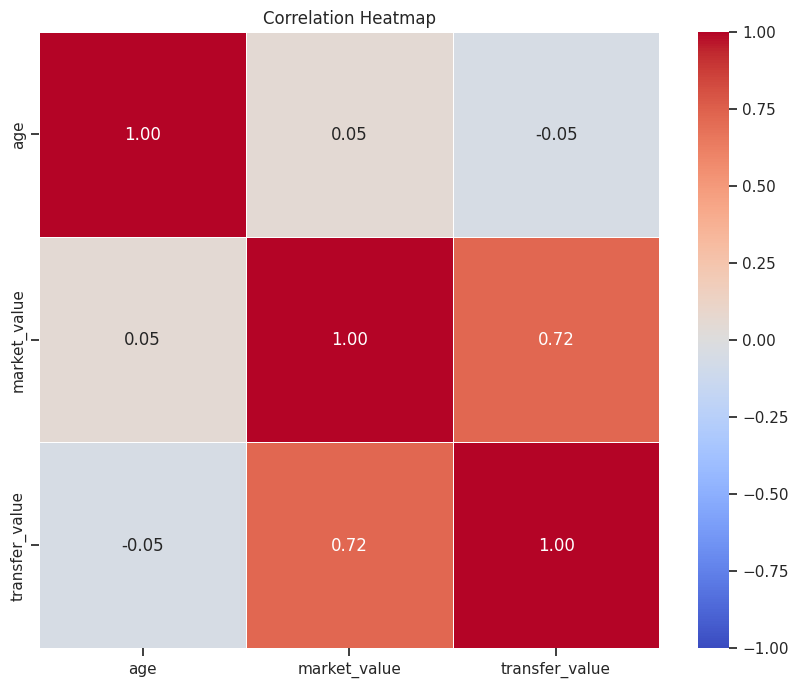

In [22]:
# Assuming df is your DataFrame
numerical_columns = ['age', 'market_value', 'transfer_value']
correlation_matrix = df4[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1,vmax=1, linewidths=0.5)

# Set the title of the heatmap
plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()